# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [10]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json

In [9]:
# to enable all the characters in a cell to be printed out in full
pd.options.display.max_colwidth = 200

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
df_predictions = pd.read_csv('image-predictions.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [200]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except  tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 92


Success
941: 753026973505581056
Success
942: 752932432744185856
Success
943: 752917284578922496
Success
944: 752701944171524096
Success
945: 752682090207055872
Success
946: 752660715232722944
Success
947: 752568224206688256
Success
948: 752519690950500352
Success
949: 752334515931054080
Success
950: 752309394570878976
Success
951: 752173152931807232
Success
952: 751950017322246144
Success
953: 751937170840121344
Success
954: 751830394383790080
Success
955: 751793661361422336
Success
956: 751598357617971201
Success
957: 751583847268179968
Success
958: 751538714308972544
Success
959: 751456908746354688
Success
960: 751251247299190784
Success
961: 751205363882532864
Success
962: 751132876104687617
Success
963: 750868782890057730
Success
964: 750719632563142656
Success
965: 750506206503038976
Success
966: 750429297815552001
Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success


Success
1192: 717841801130979328
Success
1193: 717790033953034240
Success
1194: 717537687239008257
Success
1195: 717428917016076293
Success
1196: 717421804990701568
Success
1197: 717047459982213120
Success
1198: 717009362452090881
Success
1199: 716802964044845056
Success
1200: 716791146589110272
Success
1201: 716730379797970944
Success
1202: 716447146686459905
Success
1203: 716439118184652801
Success
1204: 716285507865542656
Success
1205: 716080869887381504
Success
1206: 715928423106027520
Success
1207: 715758151270801409
Success
1208: 715733265223708672
Success
1209: 715704790270025728
Success
1210: 715696743237730304
Success
1211: 715680795826982913
Success
1212: 715360349751484417
Success
1213: 715342466308784130
Success
1214: 715220193576927233
Success
1215: 715200624753819648
Success
1216: 715009755312439296
Success
1217: 714982300363173890
Success
1218: 714962719905021952
Success
1219: 714957620017307648
Success
1220: 714631576617938945
Success
1221: 714606013974974464
Success
12

Success
1441: 696886256886657024
Success
1442: 696877980375769088
Success
1443: 696754882863349760
Success
1444: 696744641916489729
Success
1445: 696713835009417216
Success
1446: 696518437233913856
Success
1447: 696490539101908992
Success
1448: 696488710901260288
Success
1449: 696405997980676096
Success
1450: 696100768806522880
Success
1451: 695816827381944320
Success
1452: 695794761660297217
Success
1453: 695767669421768709
Success
1454: 695629776980148225
Success
1455: 695446424020918272
Success
1456: 695409464418041856
Success
1457: 695314793360662529
Success
1458: 695095422348574720
Success
1459: 695074328191332352
Success
1460: 695064344191721472
Success
1461: 695051054296211456
Success
1462: 694925794720792577
Success
1463: 694905863685980160
Success
1464: 694669722378485760
Success
1465: 694356675654983680
Success
1466: 694352839993344000
Success
1467: 694342028726001664
Success
1468: 694329668942569472
Success
1469: 694206574471057408
Success
1470: 694183373896572928
Success
14

Success
1690: 681340665377193984
Success
1691: 681339448655802368
Success
1692: 681320187870711809
Success
1693: 681302363064414209
Success
1694: 681297372102656000
Success
1695: 681281657291280384
Success
1696: 681261549936340994
Success
1697: 681242418453299201
Success
1698: 681231109724700672
Success
1699: 681193455364796417
Success
1700: 680970795137544192
Success
1701: 680959110691590145
Success
1702: 680940246314430465
Success
1703: 680934982542561280
Success
1704: 680913438424612864
Success
1705: 680889648562991104
Success
1706: 680836378243002368
Success
1707: 680805554198020098
Success
1708: 680801747103793152
Success
1709: 680798457301471234
Success
1710: 680609293079592961
Success
1711: 680583894916304897
Success
1712: 680497766108381184
Success
1713: 680494726643068929
Success
1714: 680473011644985345
Success
1715: 680440374763077632
Success
1716: 680221482581123072
Success
1717: 680206703334408192
Success
1718: 680191257256136705
Success
1719: 680176173301628928
Success
17

Rate limit reached. Sleeping for: 236


Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
1863: 675432746517426176
Success
1864: 675372240448454658
Success
1865: 675362609739206656
Success
1866: 675354435921575936
Success
1867: 675349384339542016
Success
1868: 675334060156301312
Success
1869: 675166823650848770
Success
1870: 675153376133427200
Success
18

Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
2092: 670783437142401025
Success
2093: 670782429121134593
Success
2094: 670780561024270336
Success
2095: 670778058496974848
Success
2096: 670764103623966721
Success
2097: 670755717859713024
Success
2098: 670733412878163972
Success
2099: 670727704916926465
Success
2100: 670717338665226240
Success
2101: 670704688707301377
Success
2102: 670691627984359425
Success
2103: 670679630144274432
Success
2104: 670676092097810432
Success
2105: 670668383499735048
Success
2106: 670474236058800128
Success
2107: 670468609693655041
Success
2108: 670465786746662913
Success
2109: 670452855871037440
Success
2110: 670449342516494336
Success
2111: 670444955656130560
Success
2112: 670442337873600512
Success
2113: 670435821946826752
Success
2114: 670434127938719744
Success
2115: 670433248821026816
Success
2116: 670428280563085312
Success
2117: 670427002554466305
Success
2118: 670421925039075328
Success
2119: 670420569653809152
Success
21

Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
2341: 666099513787052032
Success
2342: 666094000022159362
Success
2343: 666082916733198337
Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
2195.47207779999
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\

In [5]:
tweet_ids = df_archive.tweet_id.values
tweets = []
file = 'tweet-json.txt'

with open(file, encoding='utf-8') as file:
    for tweet in tweet_ids:
        tweets.append(file.readline()) 


In [6]:
tweets_updated = [i for i in tweets if i != '']

In [7]:
count_list = []
for i in tweets_updated:
    tweet_id = json.loads(i)['id']
    retweet_count = json.loads(i)['retweet_count']
    favourite_count = json.loads(i)['favorite_count']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

In [8]:
df_tweet = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])

In [9]:
# This code helps us to see the tweet_ids that no longer have tweet data from the data gotten via the twitter api

for t  in tweet_ids:
    if t not in df_tweet.tweet_id.values:
        print(t)

888202515573088257
771004394259247104


In [10]:
df_tweet

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing The Data

In [11]:
df_archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We usually don't rate Deck-bound Saskatoon Black Bears, but this one is h*ckin flawless. Sneaky tongue slip too. 13/10 would hug firmly https://t.co/mNuMH9400n",NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283840344065/photo/1,13,10,None,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10.

In [12]:
df_archive[(df_archive.retweeted_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [13]:
df_archive.sort_values(by='timestamp').head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://tw

In [14]:
df_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [15]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [16]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df_archive.duplicated().sum()

0

In [60]:
df_archive[df_archive.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [20]:
df_archive[df_archive.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [21]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,police_van,0.310143,False,minibus,0.068201,False
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False


In [24]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
df_predictions.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [28]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_tweet.head(100)

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
95,873580283840344065,4143,24837
96,873337748698140672,1667,0
97,873213775632977920,1667,7467
98,872967104147763200,5669,28031


### Quality issues
#### df_archive Table
1. drop rows of the table that were retweeted (these are retweeted_status_id retweeted_status_user_id rows with non_null values).

2. The tweet ids in the table is in format instead of string format

3. The timestamp column should be in timestamp format rather than string/object

4. Some of the names in the name column have values like 'a' or none which means the dogs names don't exist which should be NaN

5. Some rows in the name column have have the value 'none' mostly for dates older than 2017

6. some of the rating_denominator rows have values greater than or not equals to 10
-- some of the rating_numerators also have abnormal values (e.g. 1776)

7. expanded_urls is incomplete, 

8. some of the coumns in the df_archive table are not useful for this analysis


### df_prediction table

9. The tweet ids column should be in str format not int

10. some of the rows in the prediction table predicted the pictures not to be dogs and those are irrelevant to the analysis

11. some names of dogs in p1, p2 and p3 begin with small letters while some begin with capital letter. They should be in sentence case and not be separated by underscore(_)

### Tidiness issues
1. category of dogs spread across three columns in the df_archive table (i.e doggo, puppo, etc) should be in one column

2. rows of the df_prediction table that are predicted not to be dogs should be dropped

3. df_prediction, df_archive and df_tweet should be one dataset

## Cleaning Data

In [168]:
# Make copies of original pieces of data
clean_archive = df_archive.copy()
clean_pred = df_predictions.copy()
clean_tweet = df_tweet.copy()

### MISSING DATA AND DATA COMPLETENESS:

**Define:**
The expanded_urls column is 2297 instead of 2356, the whole column should be taken off as it is not needed for the analysis

In [169]:
# remove the expanded urls column from the dataset
clean_archive =  clean_archive.drop('expanded_urls',axis=1)

**Test**

In [170]:
'expanded_urls' in clean_archive.columns

False

#### Define: 
Dropping rows of data that were retweeted which are the retweeted_status_id and retweeted_status_user_id columns in the clean_archive dataframe

#### Code

In [171]:
clean_archive = clean_archive[(clean_archive.retweeted_status_id.isnull())|(clean_archive.retweeted_status_user_id.isnull())]

#### Test

In [172]:
# check the new shape of the dataframe
clean_archive.shape

(2175, 16)

In [173]:
# check for rows in the retweeted_status_id column that are non_null values

clean_archive[~clean_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### drop rows of images predicted not to be dogs in the image prediction dataframe

#### Define
the rows of the image prediction dataframe that have been predicted not to be dogs are irrelevant to the analysis and should be dropped. keep only rows that have p1_dog, p2_dog and p3_dog to be True

#### code

In [174]:
# remove all rows that all three predictions columns predict False ascertaining that it is definitely not a dog
clean_pred = clean_pred[(clean_pred.p1_dog ==True)&(clean_pred.p2_dog==True)&(clean_pred.p3_dog==True)]


#### check

In [175]:
 # to see if any such rows with three predictions == False exist
clean_pred.query('(p1_dog == False)|(p2_dog == False)|(p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Some columns in the clean_archive and clean_predictions dataframe are not usefull for this analysis and they should be dropped

### define:
Drop the in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp columns from the df_archive table


#### code

In [176]:
clean_archive = clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                   'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### check

In [177]:
clean_archive.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper',
       'puppo'], dtype=object)

### TIDINESS

#### doggo, floofer, pupper, puppo in four columns instead of one column

#### Define: 
Melt the dog category that was split into four different columns into one column named dog_category

#### Code

In [178]:
clean_archive['dog_category'] = clean_archive.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
clean_archive = clean_archive.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [180]:
clean_archive.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category
1594,686377065986265092,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Birf. He thinks he's gone blind. 10/10 very frightened pupper https://t.co/oDkspjNWYX,10,10,Birf,pupper
1108,734559631394082816,2016-05-23 01:40:38 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",When your friend is turnt af and you're just trying to chill. 10/10 (vid by @presgang) https://t.co/OufVDk23JC,10,10,None,NaN
1419,698342080612007937,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maximus. He's training for the tetherball world championship. The grind never stops. 11/10 (vid by @Amuly21) https://t.co/VmFfWMjNkp,11,10,Maximus,NaN
1541,689623661272240129,2016-01-20 01:41:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's terrified of the stuffed billed dog. 10/10 stay strong pupper https://t.co/QnvSjjyh7n,10,10,Lucy,pupper
1768,678389028614488064,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,11,10,Bella,pupper


#### The three datasets should be merged into one dataset

#### define:
Merge all three datasets into one dataset based on the tweet_id column from the image prediction datasets that contains images dogs and not any other object or item

#### code

In [181]:
archive_predictions = pd.merge(clean_archive,clean_pred,on='tweet_id',how='inner')
clean_twitter = pd.merge(archive_predictions,clean_tweet, on='tweet_id',how='inner')

#### test

In [188]:
clean_twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
4,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226


#### Drop the p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog and img_num columns from the data new dataframe and rename the p1 column to dog_breed

#### define:
the p1 column contains the dog breed names with the highest probability. this column would be used as the dog breed name while the other probability columns would be dropped

#### code

In [189]:
clean_twitter = clean_twitter.drop(['p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_dog','p3_conf','img_num'],axis=1)
clean_twitter = clean_twitter.rename(columns={'p1':'dog_breed'})

#### test

In [190]:
clean_twitter.head(2) # to see the columns if the changes have been effected

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,dog_breed,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461


# QUALITY

#### timestamp column contains +0000

#### define:
remove +0000 in the timestamp column

#### code

In [191]:
clean_twitter.timestamp = clean_twitter.timestamp.str.split('+').str[0]

#### test

In [192]:
clean_twitter.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,dog_breed,retweet_count,favourite_count
10,889278841981685760,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,13,10,Oliver,NaN,https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg,whippet,5637,25652
1165,667090893657276420,2015-11-18 21:23:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,7,10,Clybe,NaN,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,Chihuahua,132,349
310,797236660651966464,2016-11-12 00:36:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pancake. She loves Batman and winks like a h*ckin champ. 12/10 real crowd pleaser https://t.co/6kqsAjJNhi,12,10,Pancake,NaN,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,collie,7726,22328
534,738166403467907072,2016-06-02 00:32:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Axel. He's a professional leaf catcher. 12/10 gifted af https://t.co/P8bgOMMTRs,12,10,Axel,NaN,https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg,keeshond,3828,9635
193,826240494070030336,2017-01-31 01:27:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in any more non-dogs like this Wild Albanian Street Moose. Thank you... 11/10 https://t.co/srXL2s868C,11,10,None,NaN,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,French_bulldog,2965,14614
108,854732716440526848,2017-04-19 16:25:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marlee. She fetched a flower and immediately requested that it be placed behind her ear. 12/10 elegant af https://t.co/nJztIEON5s,12,10,Marlee,NaN,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,Pembroke,6690,24188
1075,670319130621435904,2015-11-27 19:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,11,10,None,NaN,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,Irish_terrier,1359,4110
925,676821958043033607,2015-12-15 17:51:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Finally some constructive political change in this country. 11/10 https://t.co/mvQaETHVSb,11,10,None,NaN,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,Great_Pyrenees,17605,25124
644,708738143638450176,2016-03-12 19:35:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coco. She gets to stay on the Bachelor for another week. Super pumped 11/10 https://t.co/wsCB6LFNxD,11,10,Coco,NaN,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,Pomeranian,917,2997
559,728046963732717569,2016-05-05 02:21:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Raymond. He controls fountains with his tongue. 11/10 pretty damn magical https://t.co/9aMxSbOaAZ,11,10,Raymond,NaN,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,Newfoundland,1328,4722


### Erroneous datatypes (timestamp, tweet_id, dog_category)

#### define:
change timestamp column to datetime format, tweet_id to string and dog_category to category data format

#### code

In [193]:
clean_twitter.timestamp = pd.to_datetime(clean_twitter.timestamp, format='%Y-%m-%d %H:%M:%S.%f')
clean_twitter.tweet_id = clean_twitter['tweet_id'].astype('str')
clean_twitter.dog_category = clean_twitter.dog_category.astype('category')

#### test

In [194]:
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1203 non-null   object        
 1   timestamp           1203 non-null   datetime64[ns]
 2   source              1203 non-null   object        
 3   text                1203 non-null   object        
 4   rating_numerator    1203 non-null   int64         
 5   rating_denominator  1203 non-null   int64         
 6   name                1203 non-null   object        
 7   dog_category        138 non-null    category      
 8   jpg_url             1203 non-null   object        
 9   dog_breed           1203 non-null   object        
 10  retweet_count       1203 non-null   int64         
 11  favourite_count     1203 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(6)
memory usage: 114.1+ KB


In [195]:
clean_twitter.tweet_id

0       892177421306343426
1       891815181378084864
2       891327558926688256
3       890729181411237888
4       890609185150312448
               ...        
1198    666049248165822465
1199    666044226329800704
1200    666033412701032449
1201    666029285002620928
1202    666020888022790149
Name: tweet_id, Length: 1203, dtype: object

### Names of dogs in the name column contains 'a' and 'None'

#### Define
Change the 'a' and 'None' values to NaN as this indicates that those dogs don't have names

#### Code

In [196]:
clean_twitter.name = clean_twitter.name.replace(['None','a'],np.NaN)

#### Test

In [197]:
clean_twitter.query('(name == ["a","None"])')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,dog_breed,retweet_count,favourite_count


In [200]:
clean_twitter.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,dog_breed,retweet_count,favourite_count
624,710833117892898816,2016-03-18 14:19:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sora. She's an Egyptian Pumpernickel. Mesmerizing af. 12/10 would bring home to mom https://t.co/PmTR4kxZkq,12,10,Sora,NaN,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,Pembroke,606,2937
621,711363825979756544,2016-03-20 01:28:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Please, no puparazzi"" 11/10 https://t.co/nJIXSPfedK",11,10,NaN,NaN,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,Pembroke,1287,3996
1173,666691418707132416,2015-11-17 18:56:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,8,10,Christoper,NaN,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,German_shepherd,51,196
61,872620804844003328,2017-06-08 01:06:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Monkey. She's supporting owners everywhere with her fancy #PrideMonth bandana. 13/10 love is love is love... https://t.co/lUcpnZDPz9,13,10,Monkey,NaN,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,3911,21309
1049,671134062904504320,2015-11-30 01:10:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,8,10,Clarence,NaN,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,Shih-Tzu,212,796
698,700747788515020802,2016-02-19 18:24:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,11,10,very,NaN,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,Great_Pyrenees,10673,25130
753,693231807727280129,2016-01-30 00:38:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bodie. He's not proud of what he did, but it needed to be done. 9/10 eight days was a pretty good streak tbh https://t.co/bpZsGMqVVP",9,10,Bodie,NaN,https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg,vizsla,841,3133
458,755955933503782912,2016-07-21 02:41:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a frustrated pupper attempting to escape a pool of Frosted Flakes. 12/10 https://t.co/GAYViEweWr,12,10,NaN,pupper,https://pbs.twimg.com/ext_tw_video_thumb/755955658164465664/pu/img/YcjfthN7C3z61GUj.jpg,Pekinese,3285,8092
760,692752401762250755,2016-01-28 16:53:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hello yes could I get one pupper to go please thank you""\nBoth 13/10 https://t.co/kYWcXbluUu",13,10,NaN,pupper,https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png,Samoyed,4124,7496
829,684195085588783105,2016-01-05 02:09:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tino. He really likes corndogs. 9/10 https://t.co/cUxGtnBfc2,9,10,Tino,NaN,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,Chihuahua,595,2108


### Dog breeds contain underscore separating their name and start with small letters in some cases

#### Define
replace the underscore separating the names with white space and change the names to all begin with capital letter

#### Code

In [201]:
clean_twitter.dog_breed = clean_twitter.dog_breed.str.replace('_',' ').str.title()

#### Test

In [202]:
clean_twitter.dog_breed.sample(10)

349                Golden Retriever
879                     Maltese Dog
695                       Chihuahua
1175                   Ibizan Hound
1139                     Pomeranian
453                Golden Retriever
1122                        Basenji
306     West Highland White Terrier
270                      Pomeranian
714                 Norfolk Terrier
Name: dog_breed, dtype: object

In [203]:
clean_twitter.dog_breed.str.istitle() 

0       True
1       True
2       True
3       True
4       True
        ... 
1198    True
1199    True
1200    True
1201    True
1202    True
Name: dog_breed, Length: 1203, dtype: bool

In [204]:
clean_twitter.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,dog_breed,retweet_count,favourite_count
1198,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,41,111
1199,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,147,311
1200,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,47,128
1201,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,48,132
1202,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,532,2535


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [205]:
clean_twitter.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Importing Libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set()


In [12]:
df = pd.read_csv('twitter_archive_master.csv',parse_dates=True)

### Visualizations

#### Exploring Tweets vs Tweets' time

In [13]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S.%f')

In [14]:
# group the tweet by month they where posted

tweetsMonthly = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
tweetsMonthly = tweetsMonthly[['timestamp', 'tweet_id']]
tweetsMonthly

,timestamp,tweet_id
0,2015-11-30,162
1,2015-12-31,192
2,2016-01-31,101
3,2016-02-29,71
4,2016-03-31,77
5,2016-04-30,33
6,2016-05-31,31
7,2016-06-30,44
8,2016-07-31,49
9,2016-08-31,36


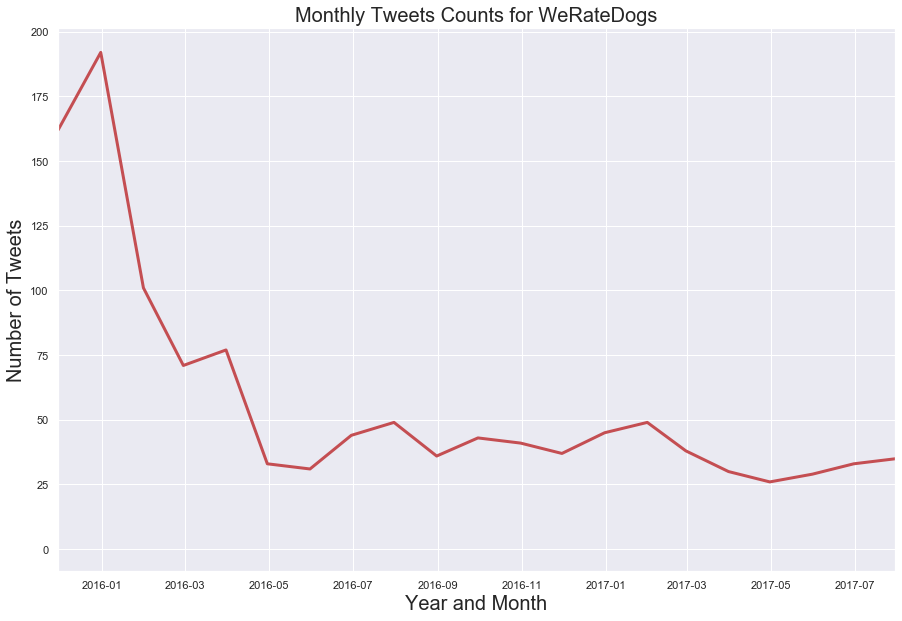

In [16]:
fig = plt.figure(figsize=(15, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);
plt.plot(tweetsMonthly.timestamp, tweetsMonthly.tweet_id,'r',linewidth=3);
plt.xlabel('Year and Month', size=20)
plt.ylabel('Number of Tweets',size=20)
plt.title('Monthly Tweets Counts for WeRateDogs', size=20);
fig.savefig('Monthly tweet.png')

from the chart above, it can be seen that the month of January 2016 recorded more tweets than any other month, and then number of tweets began to decline over the months

### Exploring the top 10 most popular Dog Breeds

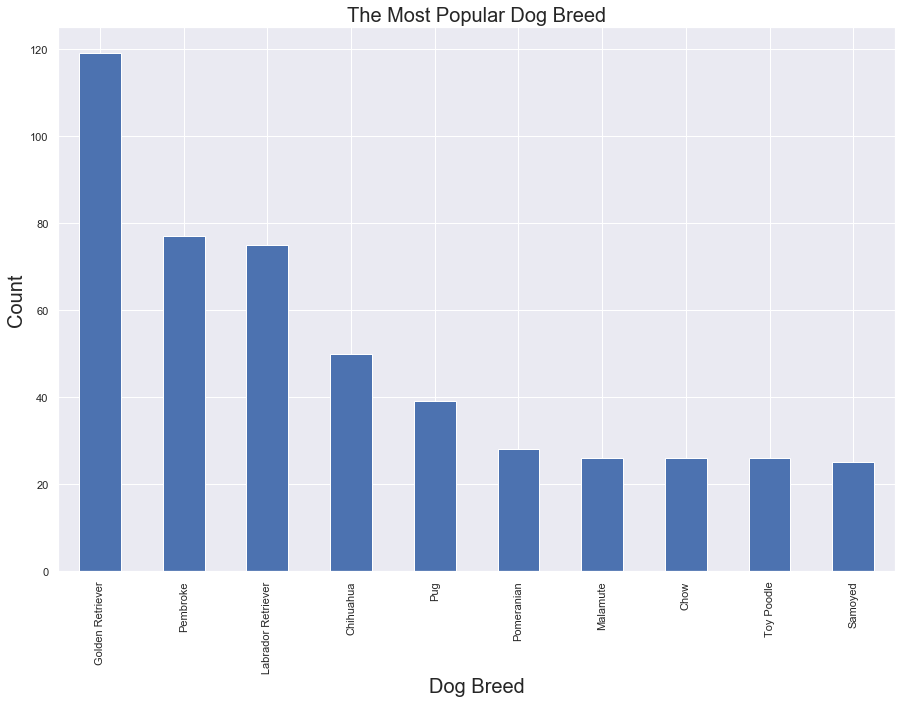

In [17]:
# plotting a bar chart of the top ten most popular dog breeds in we_rate_dogs

dog_breed = df.groupby('dog_breed').filter(lambda x: len(x) >= 25)

fig = plt.figure(figsize=(15, 10));
dog_breed['dog_breed'].value_counts().plot(kind = 'bar')
plt.xlabel('Dog Breed',size=20)
plt.ylabel('Count',size=20);
plt.title('The Most Popular Dog Breed',size=20)
fig.savefig('most_popular_dog.png')

The bar chart above shows the Golden Retriever to be the most popular dog breed followed by the Pembroke and thirdly the Labrador Retriever

This could be that Golden Retrievers are the most easily accessed dog breeds or the most loved by humans.

It could also mean that they may be the cheapest good dogs available for purchase and easy to take care of

### The most popular dog category

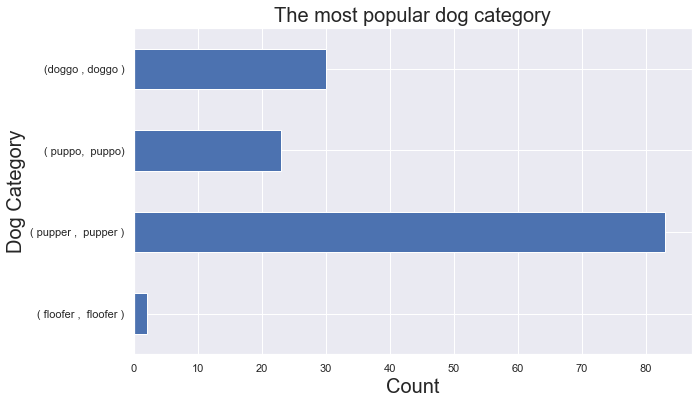

In [18]:
# plotting a bar chart to show the most popular dog category of We_Rate_dogs

dog_cat = df.groupby(by='dog_category')

fig = plt.figure(figsize=(10, 6));
dog_cat['dog_category'].value_counts().plot(kind = 'barh')
plt.xlabel('Count',size=20)
plt.ylabel('Dog Category',size=20)
plt.title('The most popular dog category', size=20)
fig.savefig('most_popular_dog_cat.png')

The chart above shows that the most recorded dog category counts indicates that puppers are by far the most rated dogs followed by doggo

This may be due to the fact that puppers are small and cute dogs

### The most popular dog category by average retweets_count

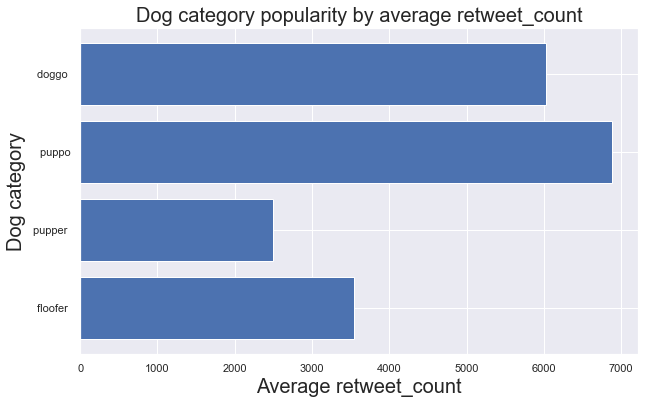

In [19]:
# plotting the average retweet count by the dog category
retweetRate = df.groupby(by='dog_category')
retweetPlot = retweetRate['retweet_count'].mean()
labels = retweetPlot.index
position = np.arange(len(retweetPlot))

fig = plt.figure(figsize=(10, 6))
plt.barh(position,retweetPlot,tick_label=labels)
plt.xlabel('Average retweet_count',size=20)
plt.ylabel('Dog category',size=20)
plt.title('Dog category popularity by average retweet_count',size=20);
fig.savefig('dog_cat_tweet_count_av.png')

The chart above shows that the puppo dog category received the most retweets among all the dog categories followed by the doggo dog category

### Visualizing the dog category by average favourite_count

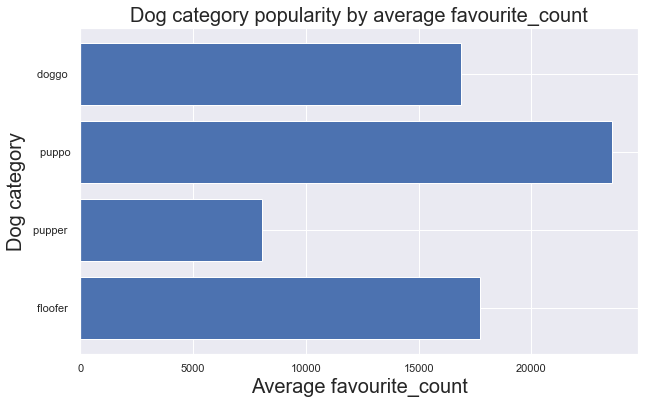

In [20]:
retweetRate = df.groupby(by='dog_category')
retweetPlot = retweetRate['favourite_count'].mean()
labels = retweetPlot.index
position = np.arange(len(retweetPlot))

# plotting the data
fig = plt.figure(figsize=(10, 6))
plt.barh(position,retweetPlot,tick_label=labels)
plt.xlabel('Average favourite_count',size=20)
plt.ylabel('Dog category',size=20)
plt.title('Dog category popularity by average favourite_count',size=20);
fig.savefig('dog_cat_pop_by_fav.png')

The chart shows that the puppo dog category has the most favourite count on the We_Rate_Dogs twitter page

### Visualizing the top 10 dog breeds with the most average retweet count

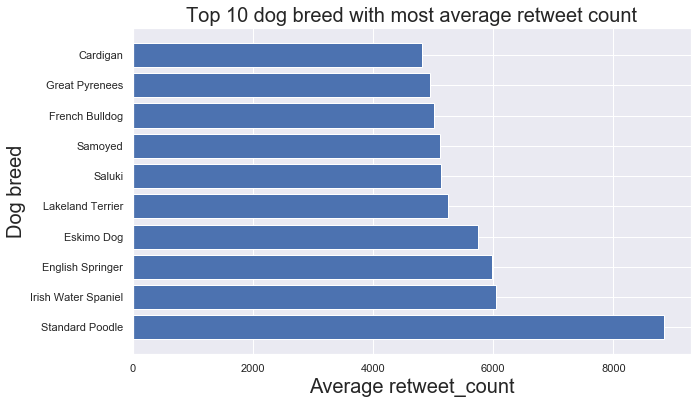

In [21]:
# grouping the dataframe by dog breed and plotting dog breed against the retweet count column

dog_breed = df.groupby(by='dog_breed')
retweet_mean = dog_breed['retweet_count'].mean().nlargest(10)
labels = retweet_mean.index
position = np.arange(len(retweet_mean))

# plotting the data
fig = plt.figure(figsize=(10, 6))
plt.barh(position,retweet_mean,tick_label=labels)
plt.xlabel('Average retweet_count',size=20)
plt.ylabel('Dog breed',size=20)
plt.title('Top 10 dog breed with most average retweet count',size=20);
fig.savefig('dog_breed_highest_retweet.png')

From the chart above, the Standard Poodle recieved the most retweet counts of all the dog breeds

### Visualizing the top 10 dog breeds with the most average favourite count

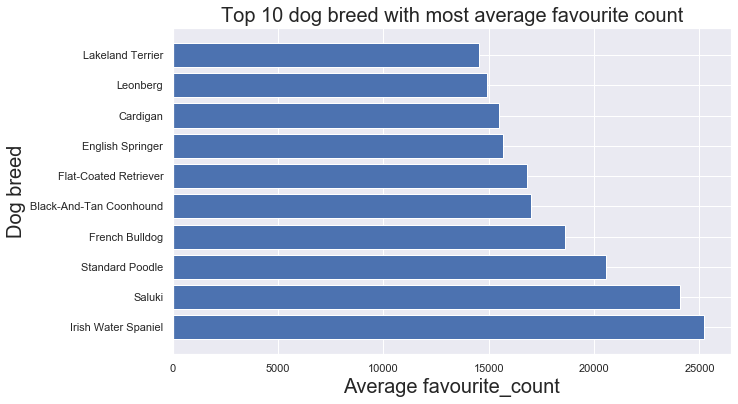

In [22]:
# grouping the dataframe by dog breed and plotting dog breed against the favourite count column
dog_breed = df.groupby(by='dog_breed')
retweet_mean = dog_breed['favourite_count'].mean().nlargest(10)
labels = retweet_mean.index
position = np.arange(len(retweet_mean))

# Plotting the data
fig = plt.figure(figsize=(10, 6))
plt.barh(position,retweet_mean,tick_label=labels)
plt.xlabel('Average favourite_count',size=20)
plt.ylabel('Dog breed',size=20)
plt.title('Top 10 dog breed with most average favourite count',size=20);
fig.savefig('dog_breed_highest_fav.png')

from the chart above, the Irish Water Spaniel recieved the highest average favourite count of all the dog breeds. This indicates that it is probably the most loved dog of all


### Insights:
1. Plotting the We_Rate_Dogs twitter data shows that tweets decreased monthly with the highest number of tweets around January of 2016

2. The data also shows that the Golden Retriever dog breed may be the most popular dog breed of all followed by the Pembroke and Labrador Retriever

3. Analysing the data also points out to the fact the most popular dog category is puppo which by far outshines the other categories. This dog category also recieved the highest mean retweet count and meand favourite count according to the data.

4. The Irish Water Spaniel is one of the most liked dogs according to the twitter data because it recieved the highest mean favourite count. Next in line the Saluki dog breed

5. The Standard Poodle is the most retweeted dog breed according to the data above. This means that twitter users retweeted this dog breed more than any other dog breed

### Limitations of the study
The analysis and study of this data was limited due the facts that:
* Some columns such as the dog_category column had a lot of missing data that classified each dog as either puppo, floofer, pupper or doggo. It is possible that one of the categories had more missing data and so was disadvantaged during the analysis
* The data was last updated in August of 2017, which implies that trends may have changed but of course the data does not capture that because it is outdated.
* Some of the columns and rows that were dropped may have been used to get more insight to the data
